# Question 2

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import control as ctrl
from scipy import signal


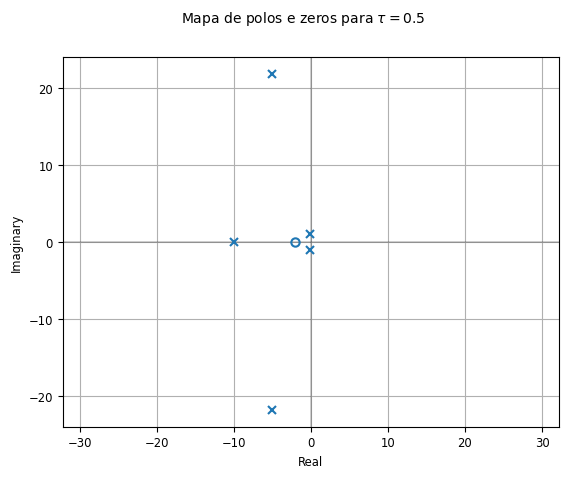

Polos: [ -5.  +21.79449472j  -5.  -21.79449472j -10.   +0.j
  -0.05 +0.99874922j  -0.05 -0.99874922j]
Zeros: [-2.+0.j]


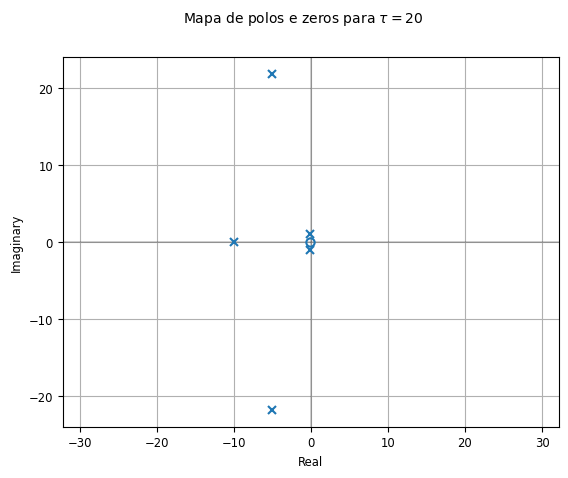

Polos: [ -5.  +21.79449472j  -5.  -21.79449472j -10.   +0.j
  -0.05 +0.99874922j  -0.05 -0.99874922j]
Zeros: [-0.05+0.j]


In [10]:
tal = [0.5, 20]
# Quando multiplicamos as partes do denominador obtemos que G(s) = (tal*s + 1)/(00.0002s^5 + 0.00402s^4 + 0.1206s^3 + 1.016s^2 + 0.22s + 1)

for i in tal:
    num = [i, 1]
    den = [0.0002, 0.00402, 0.1206, 1.016, 0.22, 1]
    system = ctrl.TransferFunction(num, den)

    # Plotando polos e zeros
    plt.figure()
    poles, zeros = ctrl.pzmap(system, plot=True, title=f'Mapa de polos e zeros para $\\tau = {i}$')

    plt.grid()
    plt.xlim(-25, 25)
    plt.savefig('Q2_tau_{}.pdf'.format(i))
    plt.show()
    print(f'Polos: {poles}')
    print(f'Zeros: {zeros}')

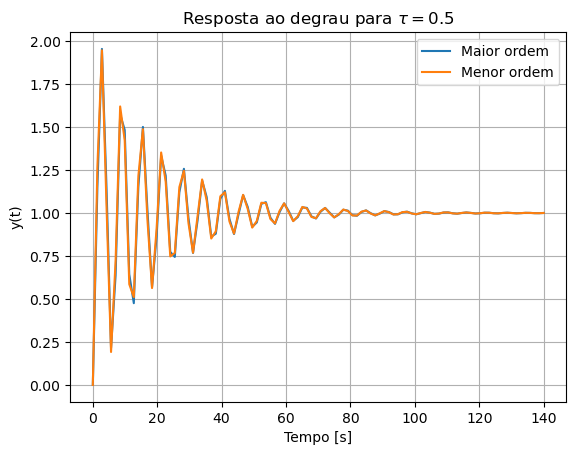

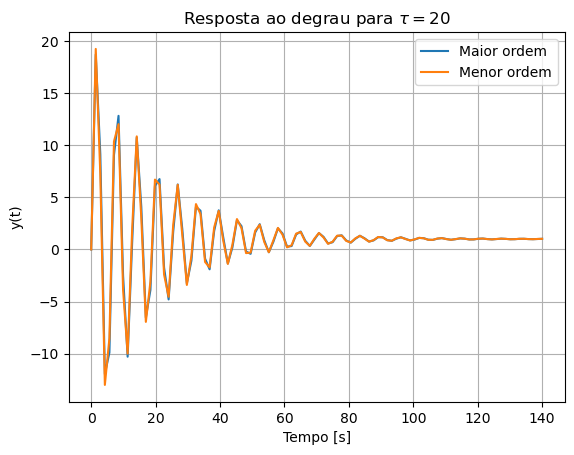

In [11]:
# Usando o argumento do polo dominante, temos que G(s) = (tal*s + 1)/(s^2 + 0.1s + 1)
# Fazendo a comparação dos dois sistemas, tanto para tal = 0.5, quanto para tal = 20, fazendo sua resposta ao degrau, obtemos:

# Para tal = 0.5
num_maiorordem_05 = [0.5, 1]
den_maiorordem_05 = [0.0002, 0.00402, 0.1206, 1.016, 0.22, 1]
num_menorordem_05 = [0.5, 1]
den_menorordem_05 = [1, 0.1, 1]
system_maiorordem_05 = signal.TransferFunction(num_maiorordem_05, den_maiorordem_05)
system_menorordem_05 = signal.TransferFunction(num_menorordem_05, den_menorordem_05)

t_maiorordem_05, y_maiorordem_05 = signal.step(system_maiorordem_05)
t_menorordem_05, y_menorordem_05 = signal.step(system_menorordem_05)

plt.figure()
plt.plot(t_maiorordem_05, y_maiorordem_05, label='Maior ordem')
plt.plot(t_menorordem_05, y_menorordem_05, label='Menor ordem')
plt.legend()
plt.ylabel('y(t)')
plt.xlabel('Tempo [s]')
plt.grid()
plt.title('Resposta ao degrau para $\\tau = 0.5$')
plt.savefig('Q2_comp_tau_0.5.pdf')
plt.show()

# Para tal = 20
num_maiorordem_20 = [20, 1]
den_maiorordem_20 = [0.0002, 0.00402, 0.1206, 1.016, 0.22, 1]
num_menorordem_20 = [20, 1]
den_menorordem_20 = [1, 0.1, 1]
system_maiorordem_20 = signal.TransferFunction(num_maiorordem_20, den_maiorordem_20)
system_menorordem_20 = signal.TransferFunction(num_menorordem_20, den_menorordem_20)

t_maiorordem_20, y_maiorordem_20 = signal.step(system_maiorordem_20)
t_menorordem_20, y_menorordem_20 = signal.step(system_menorordem_20)

plt.figure()
plt.plot(t_maiorordem_20, y_maiorordem_20, label='Maior ordem')
plt.plot(t_menorordem_20, y_menorordem_20, label='Menor ordem')
plt.legend()
plt.grid()
plt.ylabel('y(t)')
plt.xlabel('Tempo [s]')
plt.title('Resposta ao degrau para $\\tau = 20$')
plt.savefig('Q2_comp_tau_20.pdf')
plt.show()



